In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
final_dataframe = pd.read_excel("curated_data.xlsx")

### Return some basic information about the dataframe

Results to info() shows 2537 records in total, but I can also see that there are a number of fields where the city, state, or country was not found

In [4]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Business Name  2537 non-null   object
 1   Note           437 non-null    object
 2   City           2244 non-null   object
 3   State          2471 non-null   object
 4   Country        2488 non-null   object
dtypes: object(5)
memory usage: 99.2+ KB


describe() shows similar information, but it also tells me the unique count of business name/places.<br>
This means I have duplication. Note to self: clean this up at a later date in the ETL code.

In [5]:
final_dataframe.describe()

,Business Name,Note,City,State,Country
count,2537,437,2244,2471,2488
unique,2371,368,407,165,35
top,Gyu-Kaku Japanese BBQ,Tapas,Louisville,Kentucky,United States
freq,9,5,223,188,1129


Determine unique/distinct counts for each column in the dataframe

In [6]:
unique_counts = pd.DataFrame.from_records([(col, final_dataframe[col].nunique()) for col in final_dataframe.columns],columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
4,Country,35
3,State,165
1,Note,368
2,City,407
0,Business Name,2371


### Starting Analysis and Visualization

Search the "Note" column in final_dataframe for the string "happy hour"

In [7]:
happy_hour_df = final_dataframe.loc[final_dataframe["Note"].str.contains("happy hour", case=False, na=False)]
happy_hour_df


,Business Name,Note,City,State,Country
91,Hop Creek Pub,Happy hour,Napa,California,United States
126,The Manhattan Project,Happy hour select apps and drinks on thursday,Louisville,Kentucky,United States
127,August Moon Chinese Bistro,Happy hour,Louisville,Kentucky,United States
128,Ditto's Grill,Half price apps happy hour (and cheap drinks) ...,Louisville,Kentucky,United States
158,Wiltshire on Market,Thursday happy hour,Louisville,Kentucky,United States
458,Botanist,Happy hour wed&thurs 5-8,Dallas,Texas,United States
1429,The Mellwood Tavern,Fried chicken dinner Tuesday and Thursday happ...,Louisville,Kentucky,United States
1573,Tapsilog Bistro,Calamansi I’m happy hour drink,Campbell,California,United States
2002,Swizzle Dinner & Drinks,happy hour,Louisville,KY,US
2119,Coterie Restaurant & Oyster Bar,Oyster happy hour available at the bar only,New Orleans,LA,US


I would like to eventually map frequency of places in US States. <br>First, I will return a unique list of countries from 'Country'. This way I know how to filter for US States.

In [8]:
# I just realized that unique and nunique returns different values for Country: 35 vs. 36. 
# Unique includes missing value (i.e. nan)
final_dataframe.Country.unique()

array([nan, 'United States', 'Japan', 'South Korea', 'Czechia', 'Germany',
       'United Kingdom', 'Mexico', 'France', 'Hong Kong', 'Guatemala',
       'Canada', 'Thailand', 'Suriname', 'Vietnam', 'Mauritius',
       'Philippines', 'Singapore', 'Colombia', 'Türkiye', 'Taiwan',
       'China', 'South Africa', 'Switzerland', 'Indonesia', 'Croatia',
       'Slovenia', 'Austria', 'Netherlands', 'Belize', 'Italy',
       'Puerto Rico', 'US', 'PR', 'MX', 'CA'], dtype=object)

In [9]:
countries = ['United States', 'US']
us_only_places_df = final_dataframe.loc[(final_dataframe['Country'].isin(countries))]
len(us_only_places_df.index)

1864

Return a distinct list of US States <br>
Results indicate that I have a blended list of state names (long name and short name) <br>
This will likely create an issue when mapping because I will join on state name (some data will drop)

In [10]:
us_only_places_df['State'].unique()

array(['Washington', 'Iowa', 'Kentucky', 'Texas', 'Louisiana', 'Indiana',
       'Illinois', 'California', 'New York', 'Nebraska', 'Georgia',
       'Oklahoma', 'Nevada', 'Pennsylvania', 'Minnesota', 'Colorado',
       'South Carolina', 'Oregon', 'Arizona', 'Massachusetts', 'Utah',
       'Hawaii', 'Wyoming', 'New Mexico', 'Ohio', 'Florida', 'Wisconsin',
       'Tennessee', 'Michigan', 'South Dakota', 'Kansas', 'Missouri',
       'Virginia', 'District of Columbia', 'Maryland', 'North Carolina',
       'Rhode Island', 'Delaware', 'Connecticut', 'WA', 'TX', 'IA', 'NE',
       'KY', 'CA', 'FL', 'CO', 'MN', 'NY', 'MA', 'VA', 'OH', 'IN', 'LA',
       'NV', 'AZ', 'IL', 'MI', 'TN'], dtype=object)

Now that I have a dataframe with just places in the United States, I can graph the number of "places" by US States

Text(0.5, 1.0, 'Count of Places Saved for each US States')

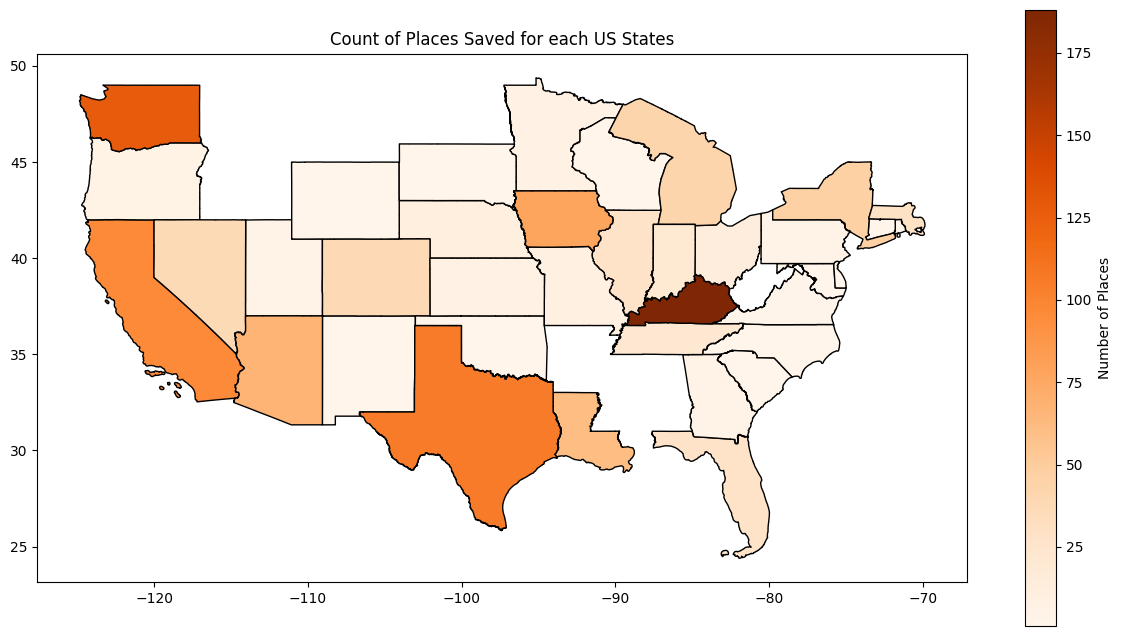

In [20]:
us_map = gpd.read_file('tl_2020_us_state.shp')
names = ['Alaska', 'Hawaii', 'United States Virgin Islands', 'Commonwealth of the Northern Mariana Islands', 'Guam', 'American Samoa', 'Puerto Rico']
updated_us_map = us_map.loc[~(us_map)['NAME'].isin(names)]
state_occurrences = us_only_places_df['State'].value_counts().reset_index().rename(columns={'index':'NAME','State':'count'})
# state_occurrences
merge_map = updated_us_map.merge(state_occurrences, on='NAME')
merge_map.plot(column='count', cmap='Oranges', legend=True, legend_kwds={'label': "Number of Places", 'orientation': "vertical", 'shrink':0.4}, figsize=(15,20), edgecolor='black')
plt.title('Count of Places Saved for each US States (DRAFT)')

I was curious if I can return the list of state names for the above shape file.
This also confirms that the shapefile is using full name for states.
If I want to further refine my data, I can go back and update all the abbreviated state names with full name.

In [12]:
gdf = gpd.read_file("tl_2020_us_state.shp")
state_names = list(gdf["NAME"])
state_names

['West Virginia',
 'Florida',
 'Illinois',
 'Minnesota',
 'Maryland',
 'Rhode Island',
 'Idaho',
 'New Hampshire',
 'North Carolina',
 'Vermont',
 'Connecticut',
 'Delaware',
 'New Mexico',
 'California',
 'New Jersey',
 'Wisconsin',
 'Oregon',
 'Nebraska',
 'Pennsylvania',
 'Washington',
 'Louisiana',
 'Georgia',
 'Alabama',
 'Utah',
 'Ohio',
 'Texas',
 'Colorado',
 'South Carolina',
 'Oklahoma',
 'Tennessee',
 'Wyoming',
 'Hawaii',
 'North Dakota',
 'Kentucky',
 'United States Virgin Islands',
 'Commonwealth of the Northern Mariana Islands',
 'Guam',
 'Maine',
 'New York',
 'Nevada',
 'Alaska',
 'American Samoa',
 'Michigan',
 'Arkansas',
 'Mississippi',
 'Missouri',
 'Montana',
 'Kansas',
 'Indiana',
 'Puerto Rico',
 'South Dakota',
 'Massachusetts',
 'Virginia',
 'District of Columbia',
 'Iowa',
 'Arizona']

The list of unique state names from my dataset is also missing several states (because I don't have anything saved for those states) <br>
This is the reason that the above choropleth map is missing some states <br>
This is me trying to resolve that issue... a left join onto the updated_us_map dataframe should return a complete list of US States (minus those I filtered in names variable)
Then, I had to change all the NaN values in count to 0

Text(0.5, 1.0, 'Count of Places Saved for each US States (FINAL)')

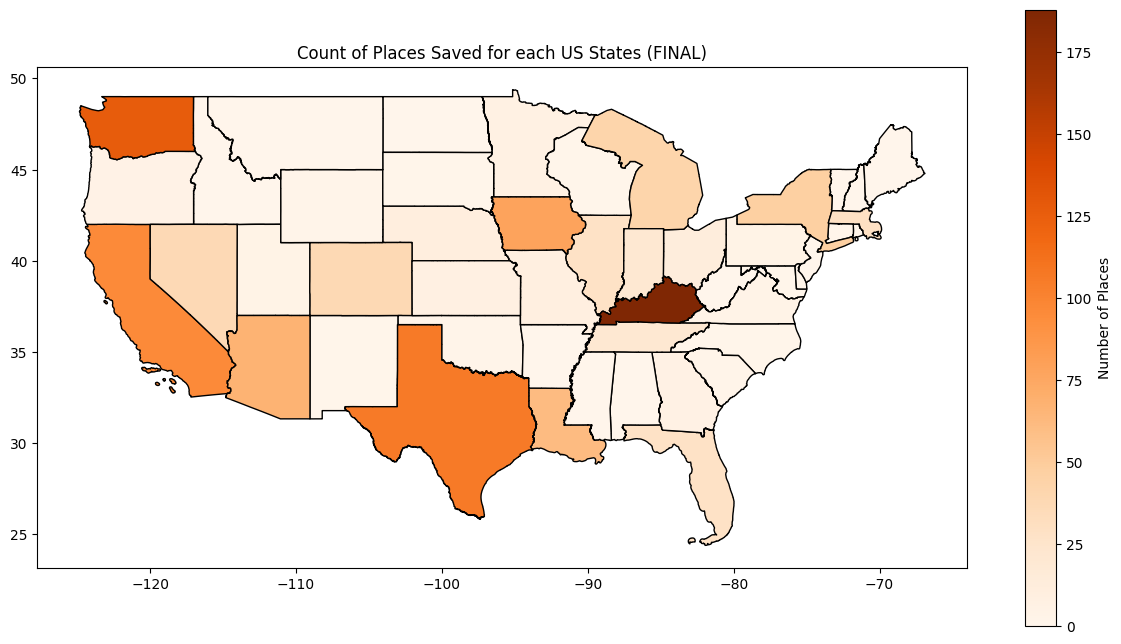

In [21]:
us_map = gpd.read_file('tl_2020_us_state.shp')
names = ['Alaska', 'Hawaii', 'United States Virgin Islands', 'Commonwealth of the Northern Mariana Islands', 'Guam', 'American Samoa', 'Puerto Rico']
updated_us_map = us_map.loc[~(us_map)['NAME'].isin(names)]
state_occurrences = us_only_places_df['State'].value_counts().reset_index().rename(columns={'index':'NAME','State':'count'})
# state_occurrences
merge_map = updated_us_map.merge(state_occurrences, on='NAME', how='left')
merge_map['count'] = merge_map['count'].fillna(0)
merge_map.plot(column='count', cmap='Oranges', legend=True, legend_kwds={'label': "Number of Places", 'orientation': "vertical", 'shrink':0.4}, figsize=(15,20), edgecolor='black')
plt.title('Count of Places Saved for each US States (FINAL)')

Graph the number of "places" by Country (i.e. the occurrences of Country in the curated dataframe)

Results here tells me that I **should** further cleanse my data so that I standardize the Country names and combine data for similar countries. For example: US and United States are the same country and **should** be combined under "United States". Further research required to return long name for: MX, PR, and CA.

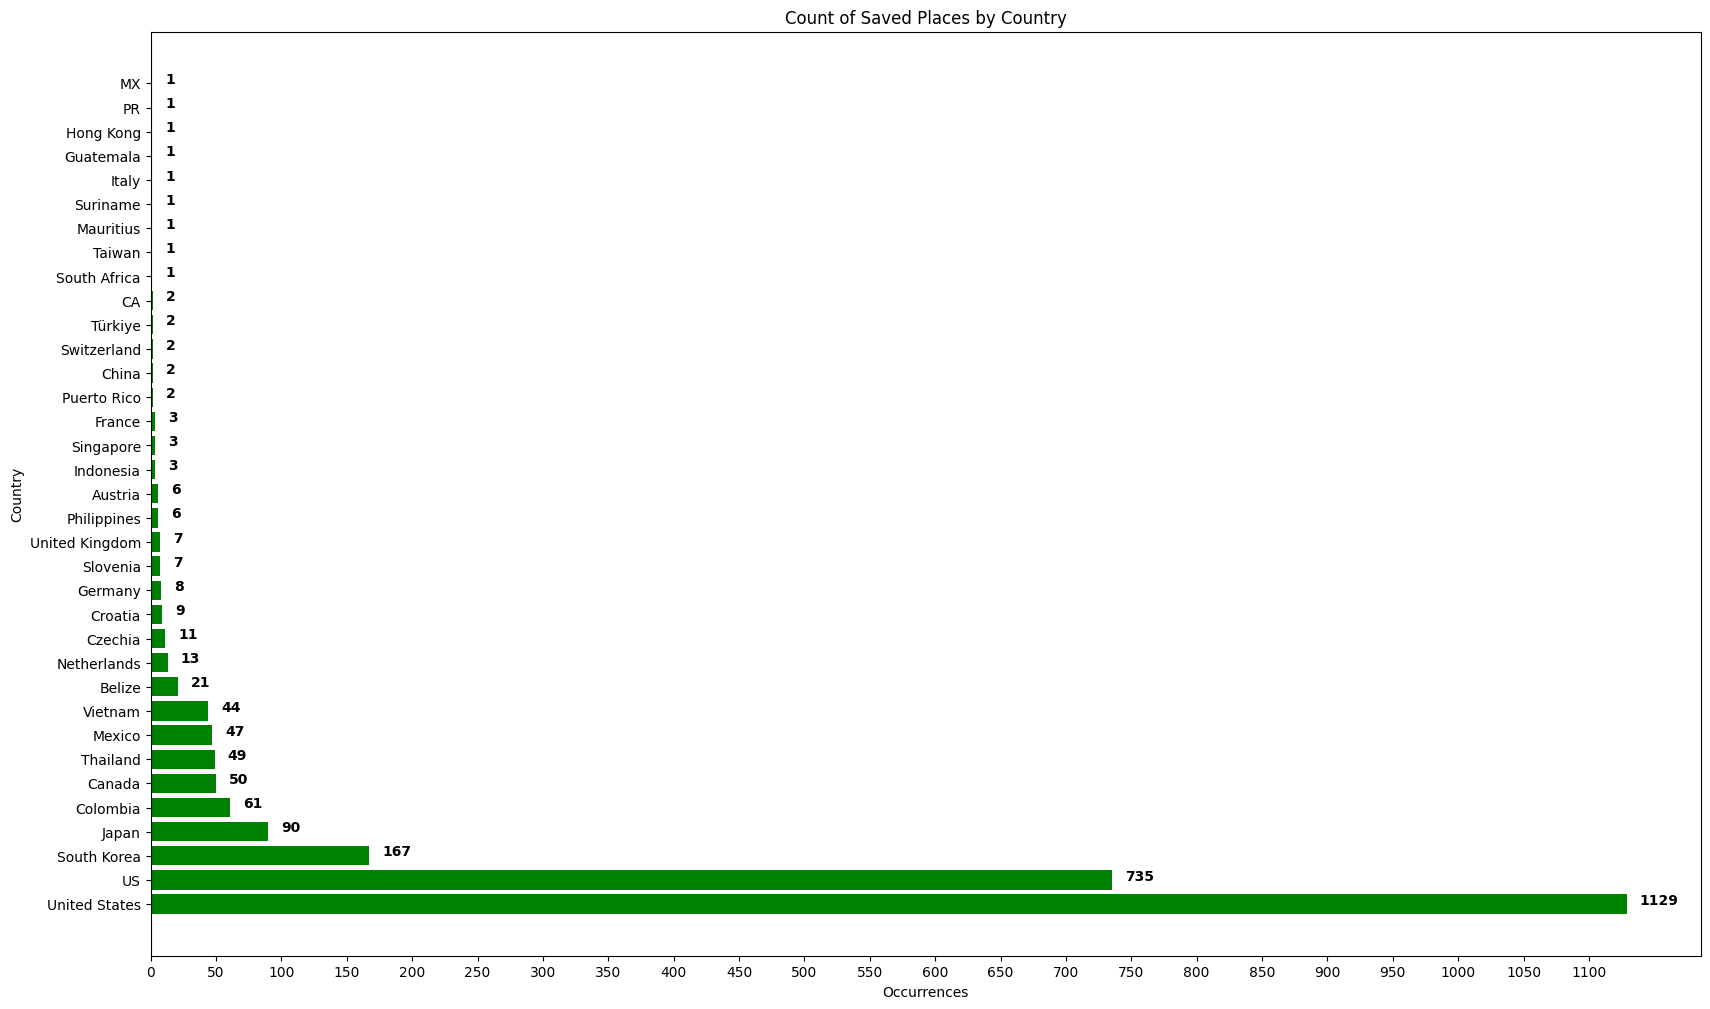

In [13]:
country_occurrences = final_dataframe['Country'].value_counts()
# colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(country_occurrences))]
plt.figure(figsize=(20, 12))
plt.barh(country_occurrences.index, country_occurrences.values, color = "g")
plt.xlabel("Occurrences")
plt.ylabel("Country")
plt.title("Count of Saved Places by Country")
plt.xticks(range(0,max(country_occurrences)+1, 50))

for i, v in enumerate(country_occurrences.values):
    plt.text(v + 10, i, str(v), color='black', fontweight='bold')
